# Kabirian-based Optinalysis: Shift Isoreflective Polymorphism

In [6]:
'''
                                # USER GUIDE
                            #******************#
# Introduction: 
    # shift isoreflective polymorphism is a is a process of generating, comparing and studying the 
        behaviors of isoreflective polymorphs with its mathematical structure. 
    
# Input guide: shift_isoreflective_polymorphism([data_length, skewization_value, pairing, print]) 
    # Input options: 
        # for data_length: number of isoreflective points you want to generate. 
        # for skewization_value: a numerical valu that creates the variations in the isoreflective polymorphs to be generated. 
        # for pairing: "pairing:H_H", or "pairing:T_T". 
        # for print_result: "kc", "psim", "pdsim", "kcalt1", or "kcalt2". 
        
# Examples:
    # print("isoreflective polymorphism =", shift_isoreflective_polymorphism([data_length, skewization_value, "pairing:H_H", "print:kc"])) 
    # print("isoreflective polymorphism =", shift_isoreflective_polymorphism([data_length, skewization_value, "pairing:H_H", "print:psim"])) 
    # print("isoreflective polymorphism =", shift_isoreflective_polymorphism([data_length, skewization_value, "pairing:H_H", "print:pdsim"])) 
    # print("isoreflective polymorphism =", shift_isoreflective_polymorphism([data_length, skewization_value, "pairing:H_H", "print:kcalt1"])) 
    # print("isoreflective polymorphism =", shift_isoreflective_polymorphism([data_length, skewization_value, "pairing:H_H", "print:kcalt2"])) 

#******************************************************************************************************#
'''
import numpy
import numpy as np
import matplotlib.pyplot as plt

def shift_isoreflective_polymorphism(instruction_list):
    data_length = instruction_list[0]
    skewization_value = instruction_list[1]
    pairing = instruction_list[2]
    print_result = instruction_list[3]
    
                     # ************** HERE ARE THE FOUNDAMENTAL CODES THAT BUILD THE DEFINITION REFERS ************** #
    # 'kc_isomorphic_optinalysis' is a tool that computes isomorphic optinalysis and return the result as Kabirian coefficient (i.e, kc).
    def kc_isomorphic_optinalysis(instruction_list):
        data_x = instruction_list[0]
        data_y = instruction_list[1]
        pairing = instruction_list[2]

        optiscale = [p/100 for p in range(1,(2*len(data_x) + 2))]
        mid_optiscale = (optiscale[0]*len(data_x)) + optiscale[0]

        if pairing == "pairing:H_H":
            isoreflective_list = data_x + [0] + (data_y[::-1])  
        elif pairing == "pairing:T_T":
            isoreflective_list = (data_x[::-1]) + [0] + data_y
        else:
            print('please, use "pairing:H_H", or "pairing:T_T" to command Head-to-head, or Tail-to-tail pairing respectivelly')

        sumOfscalements = np.dot(isoreflective_list, optiscale)

        kc_optinalysis = (mid_optiscale*sum(isoreflective_list))/sumOfscalements
        return(kc_optinalysis)

    # 'psim' is a tool and an optinalytic translation model that translates Kabirian coefficient (i.e, kc) to percentage similalrty (i.e, psim).    
    def psim(kc, num_of_dimensions):
        if 0 <=kc<= 1:
            psim = ((num_of_dimensions + 1) - kc*((2*num_of_dimensions) + 1)) / (kc - (num_of_dimensions + 1))
        else:
            psim = ((num_of_dimensions + 1) - kc) / (kc*((2*num_of_dimensions) + 1) - (num_of_dimensions + 1))
        return(psim)

    # 'pdsim' is a tool and an optinalytic translation model that translates percentage similalrty (i.e, psim) to percentage dissimilalrty (i.e, pdsim).    
    def pdsim(psim):
        if 0 <=psim<= 1:
             pdsim = 1 - psim
        else:
              pdsim = -1 - psim
        return(pdsim)

    # 'kc_alt' is a tool and an optinalytic translation model that translates backward the percentage similalrty (i.e, psim) to it's possible alternative Kabirian coefficient (i.e, kcalt1 or kcalt2). 
    def kc_alt(kc, psim, num_of_dimensions):
        if 0 <=kc<= 1:
            kc_alt = ((num_of_dimensions + 1)*(psim + 1)) / (((2*num_of_dimensions) + 1)*psim + 1)
        else:
            kc_alt = ((num_of_dimensions + 1)*(psim + 1)) / (psim + ((2*num_of_dimensions) + 1))
        return(kc_alt)

    # 'kc_alt1' is a tool and an optinalytic translation model that translates backward the percentage similalrty (i.e, psim) to one of it's possible bi-Kabirian coefficients (i.e, kcalt1).
    def kc_alt1(psim, num_of_dimensions):
        kc_alt1 = ((num_of_dimensions + 1)*(psim + 1)) / (psim + ((2*num_of_dimensions) + 1))
        return(kc_alt1)

    # 'kc_alt2' is a tool and an optinalytic translation model that translates backward the percentage similalrty (i.e, psim) to one of it's possible bi-Kabirian coefficients (i.e, kcalt2).
    def kc_alt2(psim, num_of_dimensions):
        kc_alt2 = ((num_of_dimensions + 1)*(psim + 1)) / (((2*num_of_dimensions) + 1)*psim + 1)
        return(kc_alt2)
    
    
                                # ************* HERE STARTS DEFINING THE MAIN CODES IN DEFINITION ************* #
    # 'add_to_list' is a tool that generates the isoreflective polymorphs from a givien dataset. 
    def add_to_list(instruction):
        data = instruction[0]
        skewization_value = instruction[1]
        index = instruction[2]
        data[index] += skewization_value
        return(data)
    
    def kc_shift_isoreflective_polymorphism(instruction_list):
        data_length = instruction_list[0]
        skewization_value = instruction_list[1]
        pairing = instruction_list[2]
        
        polymorphs_index = [i for i in range(0, data_length)]
        isoreflective_polymorphs = [add_to_list([[(i*0.01) for i in range(0, data_length)], a, b]) for a in [skewization_value] 
                                    for b in polymorphs_index]
        reference = [(i*0.01) for i in range(0, data_length)]
        kc = [kc_isomorphic_optinalysis([data, reference, "pairing:H_H"]) for data in isoreflective_polymorphs]
        return(kc)
    
    kc = kc_shift_isoreflective_polymorphism(instruction_list)
    num_of_dimensions = data_length
    psim = [psim(result, num_of_dimensions) for result in kc]
    pdsim = [pdsim(result) for result in psim]
    kc_alt1 = [kc_alt1(result, num_of_dimensions) for result in psim]
    kc_alt2 = [kc_alt2(result, num_of_dimensions) for result in psim]
    
    if print_result == "print:kc":
        result = kc
    elif print_result == "print:psim":
        result = psim
    elif print_result == "print:pdsim":
        result = pdsim
    elif print_result == "print:kcalt1":
        result = kc_alt1
    elif print_result == "print:kcalt2":
        result = kc_alt2
    elif print_result == "print:kcalt":
        result = kc_alt
    else:
        print('please, use "print:kc", "print:psim", "print:pdsim", "print:kcalt1", or "print:kcalt2" to command print_result')
    return(result)


# Examples

In [9]:
%%time

data_length = 10
skewization_value_1 = 0.01
skewization_value_2 = 0.1
skewization_value_3 = 3
skewization_value_4 = 6
skewization_value_5 = 9
skewization_value_6 = 10
skewization_value_7 = 20
skewization_value_8 = 100
skewization_value_9 = 1000

ips_11 = shift_isoreflective_polymorphism([data_length, skewization_value_1, "pairing:H_H", "print:kc"])
ips_12 = shift_isoreflective_polymorphism([data_length, skewization_value_2, "pairing:H_H", "print:kc"])
ips_13 = shift_isoreflective_polymorphism([data_length, skewization_value_3, "pairing:H_H", "print:kc"])
ips_14 = shift_isoreflective_polymorphism([data_length, skewization_value_4, "pairing:H_H", "print:kc"])
ips_15 = shift_isoreflective_polymorphism([data_length, skewization_value_5, "pairing:H_H", "print:kc"])
ips_16 = shift_isoreflective_polymorphism([data_length, skewization_value_6, "pairing:H_H", "print:kc"])
ips_17 = shift_isoreflective_polymorphism([data_length, skewization_value_7, "pairing:H_H", "print:kc"])
ips_18 = shift_isoreflective_polymorphism([data_length, skewization_value_8, "pairing:H_H", "print:kc"])
ips_19 = shift_isoreflective_polymorphism([data_length, skewization_value_9, "pairing:H_H", "print:kc"])

ips_21 = shift_isoreflective_polymorphism([data_length, skewization_value_1, "pairing:H_H", "print:kcalt1"])
ips_22 = shift_isoreflective_polymorphism([data_length, skewization_value_2, "pairing:H_H", "print:kcalt1"])
ips_23 = shift_isoreflective_polymorphism([data_length, skewization_value_3, "pairing:H_H", "print:kcalt1"])
ips_24 = shift_isoreflective_polymorphism([data_length, skewization_value_4, "pairing:H_H", "print:kcalt1"])
ips_25 = shift_isoreflective_polymorphism([data_length, skewization_value_5, "pairing:H_H", "print:kcalt1"])
ips_26 = shift_isoreflective_polymorphism([data_length, skewization_value_6, "pairing:H_H", "print:kcalt1"])
ips_27 = shift_isoreflective_polymorphism([data_length, skewization_value_7, "pairing:H_H", "print:kcalt1"])
ips_28 = shift_isoreflective_polymorphism([data_length, skewization_value_8, "pairing:H_H", "print:kcalt1"])
ips_29 = shift_isoreflective_polymorphism([data_length, skewization_value_9, "pairing:H_H", "print:kcalt1"])

ips_31 = shift_isoreflective_polymorphism([data_length, skewization_value_1, "pairing:H_H", "print:psim"])
ips_32 = shift_isoreflective_polymorphism([data_length, skewization_value_2, "pairing:H_H", "print:psim"])
ips_33 = shift_isoreflective_polymorphism([data_length, skewization_value_3, "pairing:H_H", "print:psim"])
ips_34 = shift_isoreflective_polymorphism([data_length, skewization_value_4, "pairing:H_H", "print:psim"])
ips_35 = shift_isoreflective_polymorphism([data_length, skewization_value_5, "pairing:H_H", "print:psim"])
ips_36 = shift_isoreflective_polymorphism([data_length, skewization_value_6, "pairing:H_H", "print:psim"])
ips_37 = shift_isoreflective_polymorphism([data_length, skewization_value_7, "pairing:H_H", "print:psim"])
ips_38 = shift_isoreflective_polymorphism([data_length, skewization_value_8, "pairing:H_H", "print:psim"])
ips_39 = shift_isoreflective_polymorphism([data_length, skewization_value_9, "pairing:H_H", "print:psim"])


Wall time: 17 ms


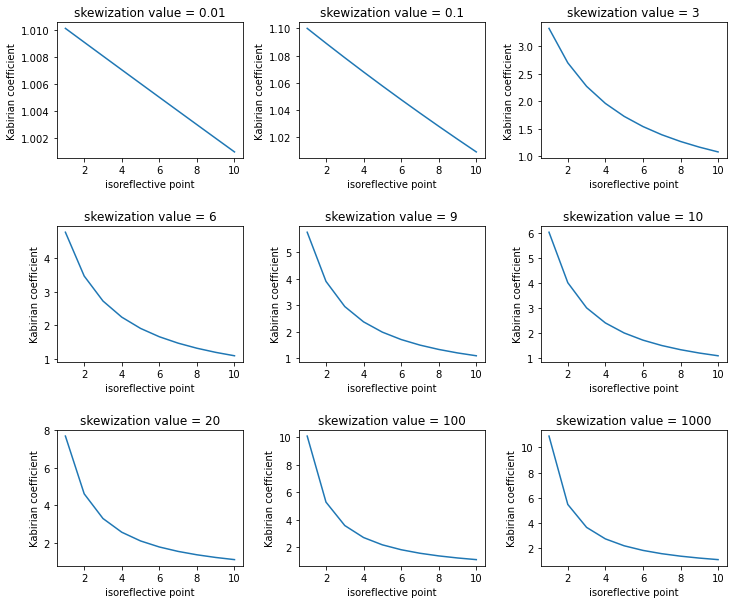

In [12]:
        #'''******* creating a plot for the kc outcomes to study the behavoirs of the isoreflective points *******'''
x1 = [i+1 for i in range(0, data_length)]
fig, axs =plt.subplots(3, 3)

# plotting points on each subplot
axs[0, 0].plot(x1, ips_11, color ='C0')
axs[0, 0].set_title('skewization value = 0.01')

axs[0, 1].plot(x1, ips_12, color ='C0')
axs[0, 1].set_title('skewization value = 0.1')

axs[0, 2].plot(x1, ips_13, color ='C0')
axs[0, 2].set_title('skewization value = 3')

axs[1, 0].plot(x1, ips_14, color ='C0')
axs[1, 0].set_title('skewization value = 6')

axs[1, 1].plot(x1, ips_15, color ='C0')
axs[1, 1].set_title('skewization value = 9')

axs[1, 2].plot(x1, ips_16, color ='C0')
axs[1, 2].set_title('skewization value = 10')

axs[2, 0].plot(x1, ips_17, color ='C0')
axs[2, 0].set_title('skewization value = 20')

axs[2, 1].plot(x1, ips_18, color ='C0')
axs[2, 1].set_title('skewization value = 100')

axs[2, 2].plot(x1, ips_19, color ='C0')
axs[2, 2].set_title('skewization value = 1000')

for ax in axs.flat:
    ax.set(xlabel='isoreflective point', ylabel='Kabirian coefficient')
    
#for ax in axs.flat:
 #   ax.label_outer()

# adjusting space between subplots
fig.subplots_adjust(hspace=.5,wspace=0.3)

# set figure size
fig = plt.gcf(); fig.set_size_inches(12, 10)

# saving the figure
#plt.savefig("shift_isoreflective_polymorphism.png")
    
# function to show the plot
plt.show()        #'''******* creating a plot for the kc outcomes to study the behavoirs of the isoreflective points *******'''

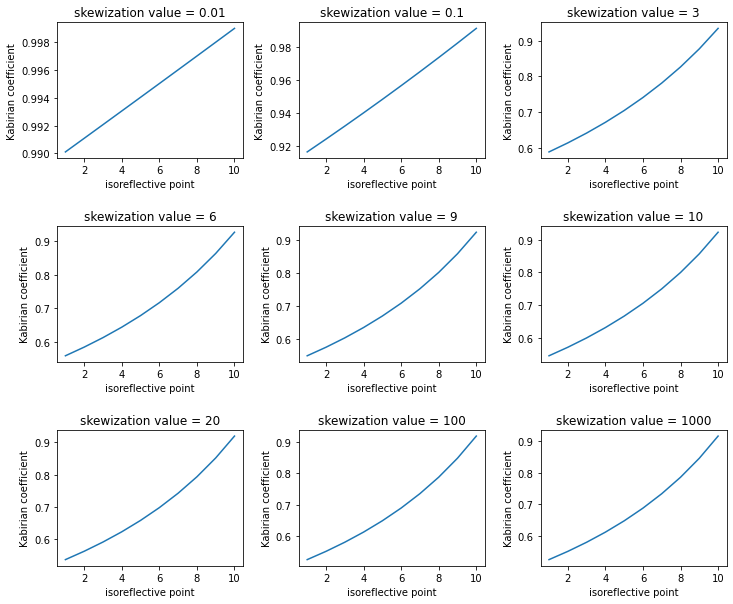

In [13]:
        #'''******* creating a plot for the kcalt1 outcomes to study the behavoirs of the isoreflective points *******'''
fig, axs =plt.subplots(3, 3)

# plotting points on each subplot
axs[0, 0].plot(x1, ips_21, color ='C0')
axs[0, 0].set_title('skewization value = 0.01')

axs[0, 1].plot(x1, ips_22, color ='C0')
axs[0, 1].set_title('skewization value = 0.1')

axs[0, 2].plot(x1, ips_23, color ='C0')
axs[0, 2].set_title('skewization value = 3')

axs[1, 0].plot(x1, ips_24, color ='C0')
axs[1, 0].set_title('skewization value = 6')

axs[1, 1].plot(x1, ips_25, color ='C0')
axs[1, 1].set_title('skewization value = 9')

axs[1, 2].plot(x1, ips_26, color ='C0')
axs[1, 2].set_title('skewization value = 10')

axs[2, 0].plot(x1, ips_27, color ='C0')
axs[2, 0].set_title('skewization value = 20')

axs[2, 1].plot(x1, ips_28, color ='C0')
axs[2, 1].set_title('skewization value = 100')

axs[2, 2].plot(x1, ips_29, color ='C0')
axs[2, 2].set_title('skewization value = 1000')

for ax in axs.flat:
    ax.set(xlabel='isoreflective point', ylabel='Kabirian coefficient')
    
#for ax in axs.flat:
#    ax.label_outer()

# adjusting space between subplots
fig.subplots_adjust(hspace=.5,wspace=0.3)

# set figure size
fig = plt.gcf(); fig.set_size_inches(12, 10)

# saving the figure
#plt.savefig("shift_isoreflective_polymorphism_kcalt.png")
    
# function to show the plot
plt.show()

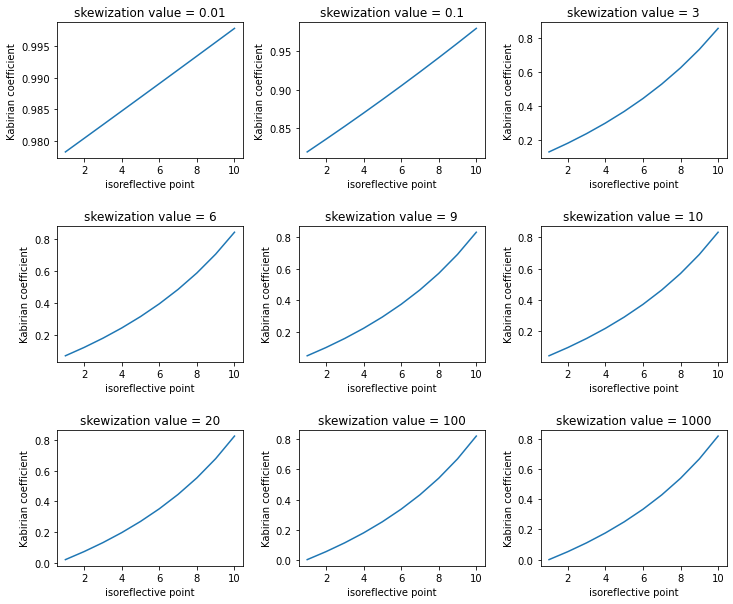

In [18]:
        #'''******* creating a plot for the psim outcomes to study the behavoirs of the isoreflective points *******'''
fig, axs =plt.subplots(3, 3)

# plotting points on each subplot
axs[0, 0].plot(x1, ips_31, color ='C0')
axs[0, 0].set_title('skewization value = 0.01')

axs[0, 1].plot(x1, ips_32, color ='C0')
axs[0, 1].set_title('skewization value = 0.1')

axs[0, 2].plot(x1, ips_33, color ='C0')
axs[0, 2].set_title('skewization value = 3')

axs[1, 0].plot(x1, ips_34, color ='C0')
axs[1, 0].set_title('skewization value = 6')

axs[1, 1].plot(x1, ips_35, color ='C0')
axs[1, 1].set_title('skewization value = 9')

axs[1, 2].plot(x1, ips_36, color ='C0')
axs[1, 2].set_title('skewization value = 10')

axs[2, 0].plot(x1, ips_37, color ='C0')
axs[2, 0].set_title('skewization value = 20')

axs[2, 1].plot(x1, ips_38, color ='C0')
axs[2, 1].set_title('skewization value = 100')

axs[2, 2].plot(x1, ips_39, color ='C0')
axs[2, 2].set_title('skewization value = 1000')

for ax in axs.flat:
    ax.set(xlabel='isoreflective point', ylabel='Kabirian coefficient')
    
#for ax in axs.flat:
#    ax.label_outer()

# adjusting space between subplots
fig.subplots_adjust(hspace=.5,wspace=0.3)

# set figure size
fig = plt.gcf(); fig.set_size_inches(12, 10)

# saving the figure
#plt.savefig("shift_isoreflective_polymorphism_kcalt.png")


In [19]:
import numpy as np
import matplotlib.pyplot as plt
  
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

x = np.array(x1)
y = np.array(ips_11)

x = x.reshape(-1,1)
regression_model = LinearRegression()
  
# Fit the data(train the model)
regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
  
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-0.00101009]
Intercept: 1.0110887008520377
MSE: 5.435944607147004e-11
Root mean squared error:  7.372885871317284e-06
R2 score:  0.999993541936194
